In [1]:
# Description: Use the Relative Strength Index (RSI) and python to determine if a stock is bring over bought or over sold

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving FB.csv to FB.csv


In [5]:
# Store the data
FB = pd.read_csv('FB.csv')
# Show the data
FB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-19,186.009995,187.500000,184.850006,186.169998,186.169998,9691200
1,2019-08-20,185.449997,186.000000,182.389999,183.809998,183.809998,10083400
2,2019-08-21,185.000000,185.899994,183.139999,183.550003,183.550003,8398200
3,2019-08-22,183.429993,184.110001,179.910004,182.039993,182.039993,10821400
4,2019-08-23,180.839996,183.130005,176.660004,177.750000,177.750000,17323400
...,...,...,...,...,...,...,...
248,2020-08-12,258.970001,263.899994,258.109985,259.890015,259.890015,21428300
249,2020-08-13,261.549988,265.160004,259.570007,261.299988,261.299988,17374000
250,2020-08-14,262.309998,262.649994,258.679993,261.239990,261.239990,14792700
251,2020-08-17,262.500000,264.100006,259.399994,261.160004,261.160004,13339800


In [7]:
# Set the date as the index for the data
FB = FB.set_index(pd.DatetimeIndex(FB['Date'].values))
FB

,Date,Open,High,Low,Close,Adj Close,Volume
2019-08-19,2019-08-19,186.009995,187.500000,184.850006,186.169998,186.169998,9691200
2019-08-20,2019-08-20,185.449997,186.000000,182.389999,183.809998,183.809998,10083400
2019-08-21,2019-08-21,185.000000,185.899994,183.139999,183.550003,183.550003,8398200
2019-08-22,2019-08-22,183.429993,184.110001,179.910004,182.039993,182.039993,10821400
2019-08-23,2019-08-23,180.839996,183.130005,176.660004,177.750000,177.750000,17323400
...,...,...,...,...,...,...,...
2020-08-12,2020-08-12,258.970001,263.899994,258.109985,259.890015,259.890015,21428300
2020-08-13,2020-08-13,261.549988,265.160004,259.570007,261.299988,261.299988,17374000
2020-08-14,2020-08-14,262.309998,262.649994,258.679993,261.239990,261.239990,14792700
2020-08-17,2020-08-17,262.500000,264.100006,259.399994,261.160004,261.160004,13339800


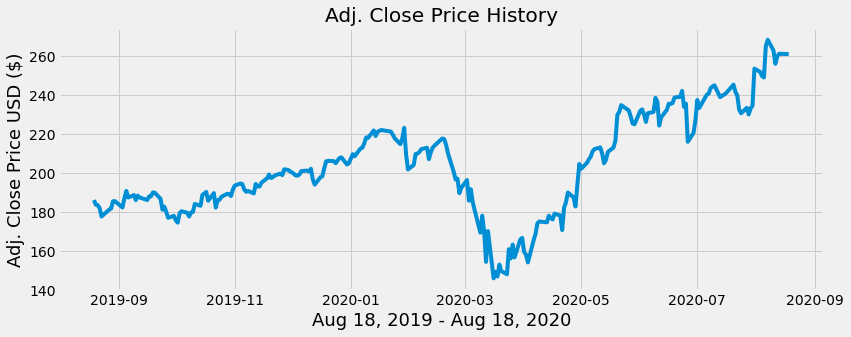

In [10]:
# Visually show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(FB.index, FB['Adj Close'], label = 'Adj Close Price')
plt.title('Adj. Close Price History')
plt.xlabel('Aug 18, 2019 - Aug 18, 2020', fontsize=18)
plt.ylabel('Adj. Close Price USD ($)', fontsize= 18)
plt.show()

In [11]:
# Prepare the data to calculate the RSI

# Get the difference in price from the previous day
delta = FB['Adj Close'].diff(1)
delta

2019-08-19         NaN
2019-08-20   -2.360000
2019-08-21   -0.259995
2019-08-22   -1.510010
2019-08-23   -4.289993
                ...   
2020-08-12    3.760010
2020-08-13    1.409973
2020-08-14   -0.059998
2020-08-17   -0.079986
2020-08-18   -0.059998
Name: Adj Close, Length: 253, dtype: float64

In [12]:
# Get rid of NaN
delta = delta.dropna()
delta

2019-08-20   -2.360000
2019-08-21   -0.259995
2019-08-22   -1.510010
2019-08-23   -4.289993
2019-08-26    2.610001
                ...   
2020-08-12    3.760010
2020-08-13    1.409973
2020-08-14   -0.059998
2020-08-17   -0.079986
2020-08-18   -0.059998
Name: Adj Close, Length: 252, dtype: float64

In [14]:
# Get hthe positive gains (up) and the negative gains (down)
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0

In [15]:
# Get the time period
period = 14

# Calcualte the average gain and the average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [17]:
# Calculate the RSI

# Calculate the Relative Strength (RS)
RS = AVG_Gain/AVG_Loss
# Calculate the Relative Strength Index (RSI)
RSI = 100.0 - (100.0/(1.0 + RS))

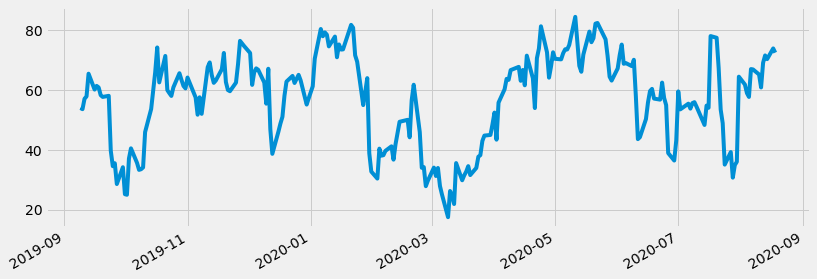

In [18]:
# Show the RSI Visually
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [19]:
# Pull it all together

# Create a new data frame
new_df = pd.DataFrame()
new_df['Adj Close'] = FB['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close,RSI
2019-08-19,186.169998,NaN
2019-08-20,183.809998,NaN
2019-08-21,183.550003,NaN
2019-08-22,182.039993,NaN
2019-08-23,177.750000,NaN
...,...,...
2020-08-12,259.890015,69.070582
2020-08-13,261.299988,71.521025
2020-08-14,261.239990,70.295575
2020-08-17,261.160004,73.862254


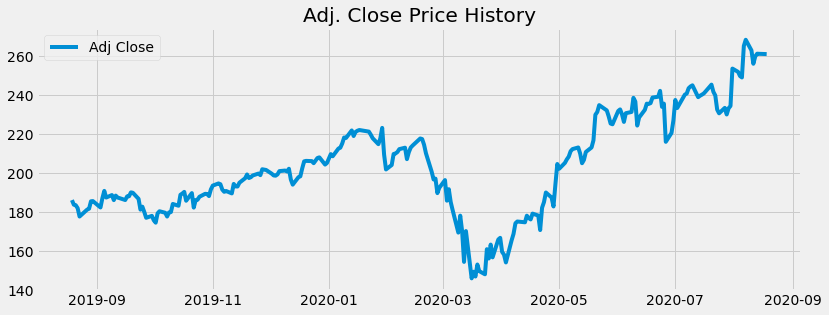

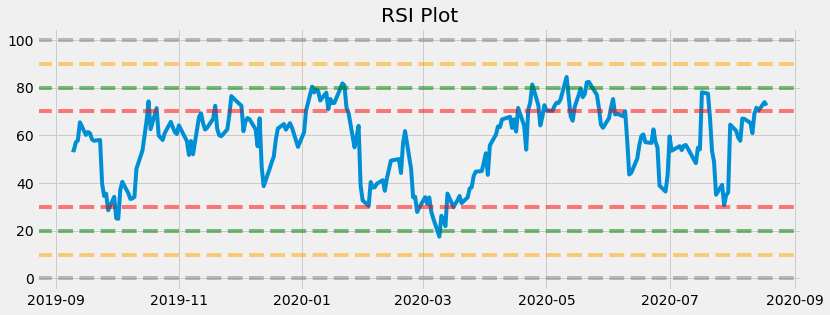

In [21]:
# Visually show the adjusted close price and RSI

# Plot the adjusted close price
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index,new_df['Adj Close'])
plt.title('Adj. Close Price History')
plt.legend(new_df.columns.values, loc='upper left')
plt.show()

# Plot the corresponding RSI values and the significant levels
plt.figure(figsize=(12.2, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha=0.5, color ='gray')
plt.axhline(10, linestyle='--', alpha=0.5, color ='orange')
plt.axhline(20, linestyle='--', alpha=0.5, color ='green')
plt.axhline(30, linestyle='--', alpha=0.5, color ='red')
plt.axhline(70, linestyle='--', alpha=0.5, color ='red')
plt.axhline(80, linestyle='--', alpha=0.5, color ='green')
plt.axhline(90, linestyle='--', alpha=0.5, color ='orange')
plt.axhline(100, linestyle='--', alpha=0.5, color ='gray')
plt.show()
